In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , BatchNormalization , Dropout ,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 38.14 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [5]:
data = pd.read_csv('./Movies-Poster_Dataset/train.csv')

In [6]:
img_width = 240
img_height = 240
X = []
for i in tqdm(range(data.shape[0])):
    path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
    img = image.load_img(path,target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
X = np.array(X)

100%|██████████| 7254/7254 [00:23<00:00, 309.83it/s]


In [7]:
y = data.drop(['Id','Genre'],axis = 1)
y = y.to_numpy()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.15)

In [9]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))




In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 117, 117, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 32)        0

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
193/193 [==============================] - 507s 3s/step - loss: 0.7082 - accuracy: 0.0975 - val_loss: 0.3506 - val_accuracy: 0.1901
Epoch 2/30
193/193 [==============================] - 509s 3s/step - loss: 0.3110 - accuracy: 0.2602 - val_loss: 0.2539 - val_accuracy: 0.1901
Epoch 3/30
193/193 [==============================] - 510s 3s/step - loss: 0.2622 - accuracy: 0.2853 - val_loss: 0.2459 - val_accuracy: 0.1928
Epoch 4/30
193/193 [==============================] - 507s 3s/step - loss: 0.2535 - accuracy: 0.2980 - val_loss: 0.2436 - val_accuracy: 0.1974
Epoch 5/30
193/193 [==============================] - 506s 3s/step - loss: 0.2467 - accuracy: 0.3150 - val_loss: 0.2487 - val_accuracy: 0.1965
Epoch 6/30
193/193 [==============================] - 503s 3s/step - loss: 0.2421 - accuracy: 0.3195 - val_loss: 0.2508 - val_accuracy: 0.1993
Epoch 7/30
193/193 [==============================] - 506s 3s/step - loss: 0.2404 - accuracy: 0.3275 - val_loss: 0.2614 - val_accuracy: 0.1965

Testing Model

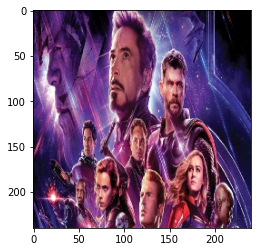

In [13]:
img = image.load_img('/content/Movies-Poster_Dataset/endgame.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width,img_height,3)


In [15]:
classes = data.columns[2:]
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [17]:
y_prob = model.predict(img)
y_prob

array([[8.0697566e-02, 1.3864359e-01, 2.8613985e-02, 5.0920814e-02,
        4.0237346e-01, 8.0676109e-02, 4.4621468e-02, 6.3924152e-01,
        8.1590265e-02, 7.1564794e-02, 2.0010948e-02, 2.7639955e-02,
        3.1863391e-02, 1.3422757e-02, 3.6963940e-02, 7.3435903e-04,
        1.8916130e-03, 1.0830028e-04, 2.5596249e-01, 2.8369516e-02,
        2.4163723e-03, 2.7256548e-02, 4.9201965e-02, 1.5747160e-02,
        3.9416850e-03]], dtype=float32)

In [18]:
top3 = np.argsort(y_prob[0])[-4:-1]

In [19]:
for i in range(3):
  print(classes[top3[i]])

Adventure
Romance
Comedy


Adventure
Biography
Documentary


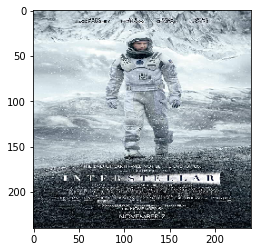

In [21]:
img = image.load_img('/content/inter.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width,img_height,3)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[-4:-1]
for i in range(3):
  print(classes[top3[i]])

Biography
Thriller
Romance


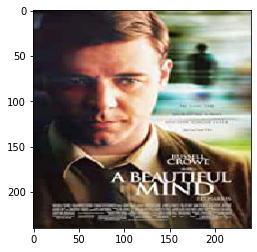

In [24]:
img = image.load_img('/content/mind.jpg',target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1,img_width,img_height,3)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[-4:-1]
for i in range(3):
  print(classes[top3[i]])